# Clasificación de Supernovas usando redes MLP
## usando los datos del extraidos del notebook SN_feature_extraction

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from datetime import datetime
inicio_ejecucion = time.time()

In [2]:
import pandas as pd
url_features_clean_unbalanced='https://raw.githubusercontent.com/joaquinzepeda/Datos/main/datos%20supernovas/features_clean_unbalanced.csv'
features_clean_unbalanced = pd.read_csv(url_features_clean_unbalanced, index_col=None)
features_clean_unbalanced = features_clean_unbalanced.set_index('oid')
features_clean_unbalanced

,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_2,delta_period_2,MHPS_ratio_1,MHPS_low_1,...,SPM_tau_rise_1,SPM_tau_fall_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,SPM_chi_2,classALeRCE
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aadlxmv,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.069774,51.560655,24.510580,3.971278,...,2.329822,11.688865,0.311686,6.958040,21.231911,0.416776,3.677212,30.091547,0.594410,SNIa
ZTF18aacdbzx,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.185710,0.029147,0.752135,0.016245,...,3.344742,24.821418,0.114158,-5.114811,13.845734,0.063725,10.514372,20.820992,0.044529,SNIbc
ZTF18aadmssd,3.293953,1.0,2.170098,1.0,1.005344,0.056146,999.999953,998.994608,337.794556,34.621597,...,2.939173,22.204705,2.067952,-22.606529,39.255637,0.755130,17.087419,46.760685,1.111489,SNII
ZTF18aadzfso,1.371363,1.0,0.797367,1.0,1.028361,0.034737,37.037036,36.008675,0.751511,0.199288,...,3.554814,14.225585,0.257985,4.309858,18.030784,0.606824,3.959666,85.046677,0.027387,SNIa
ZTF18aaermez,0.728745,1.0,1.682007,1.0,0.117252,0.008665,0.183438,0.066186,3.026673,0.060769,...,8.207399,21.426885,0.456477,-10.767997,44.214095,0.483826,25.675861,25.166046,17.122697,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20abgbxfm,2.981503,1.0,2.216758,1.0,104.972373,0.126945,142.857138,37.884766,191.005722,13.320155,...,3.176701,24.208459,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
ZTF20abgdtmv,2.669654,1.0,1.719614,1.0,73.929961,0.074820,76.923075,2.993114,112.711197,14.528273,...,6.300816,10.058062,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
ZTF20abgfekk,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,3.911379,0.107875,...,3.415255,19.974884,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa


In [3]:
count_clase1 = pd.DataFrame({'classALeRCE':features_clean_unbalanced['classALeRCE']})
count_clase1.groupby(count_clase1.columns.tolist(),as_index=False).size()

,classALeRCE,size
0,SLSN,33
1,SNII,339
2,SNIa,1278
3,SNIbc,82


# Unión de las supernovas clase II
## Se unen las clases SNII,SNIIb,SNIIn	

In [4]:
features_clean_unbalanced['classALeRCE']= features_clean_unbalanced['classALeRCE'].replace(['SNIIb','SNIIn'],'SNII')
features_clean_unbalanced

,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_2,delta_period_2,MHPS_ratio_1,MHPS_low_1,...,SPM_tau_rise_1,SPM_tau_fall_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,SPM_chi_2,classALeRCE
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aadlxmv,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.069774,51.560655,24.510580,3.971278,...,2.329822,11.688865,0.311686,6.958040,21.231911,0.416776,3.677212,30.091547,0.594410,SNIa
ZTF18aacdbzx,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.185710,0.029147,0.752135,0.016245,...,3.344742,24.821418,0.114158,-5.114811,13.845734,0.063725,10.514372,20.820992,0.044529,SNIbc
ZTF18aadmssd,3.293953,1.0,2.170098,1.0,1.005344,0.056146,999.999953,998.994608,337.794556,34.621597,...,2.939173,22.204705,2.067952,-22.606529,39.255637,0.755130,17.087419,46.760685,1.111489,SNII
ZTF18aadzfso,1.371363,1.0,0.797367,1.0,1.028361,0.034737,37.037036,36.008675,0.751511,0.199288,...,3.554814,14.225585,0.257985,4.309858,18.030784,0.606824,3.959666,85.046677,0.027387,SNIa
ZTF18aaermez,0.728745,1.0,1.682007,1.0,0.117252,0.008665,0.183438,0.066186,3.026673,0.060769,...,8.207399,21.426885,0.456477,-10.767997,44.214095,0.483826,25.675861,25.166046,17.122697,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20abgbxfm,2.981503,1.0,2.216758,1.0,104.972373,0.126945,142.857138,37.884766,191.005722,13.320155,...,3.176701,24.208459,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
ZTF20abgdtmv,2.669654,1.0,1.719614,1.0,73.929961,0.074820,76.923075,2.993114,112.711197,14.528273,...,6.300816,10.058062,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
ZTF20abgfekk,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,3.911379,0.107875,...,3.415255,19.974884,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa


In [5]:
count_clase2 = pd.DataFrame({'classALeRCE':features_clean_unbalanced['classALeRCE']})
count_clase2 = count_clase1.groupby(count_clase2.columns.tolist(),as_index=False).size()
count_clase2

,classALeRCE,size
0,SLSN,33
1,SNII,339
2,SNIa,1278
3,SNIbc,82



# Separación del conjunto en ENTRENAMIENTO y TEST:

Dividiremos el conjunto en 70% para entrenamiento y 30% para test


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # se codifica la clase
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.utils import to_categorical
le = LabelEncoder()


X, y = features_clean_unbalanced.iloc[:,:-1], features_clean_unbalanced['classALeRCE']
# label encode the target variable
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [7]:
y_sin_codificar = le.inverse_transform(y)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dropout

In [10]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [17]:
## Defining various initialization parameters for 163-80-40-4 MLP model
num_classes = 4
#num_features = X_train.shape[1]
feature_vector_length = X_train.shape[1]
num_output = 4
num_layers_0 = 64
num_layers_1 = 64
starter_learning_rate = 0.001
regularizer_rate = 0.1


# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (92,)


In [18]:
dropout=0.5
# Create the model
model= Sequential(name='3_layer_mlp')
model.add(Dense(num_layers_0, input_shape=input_shape, activation='sigmoid'))
model.add(Dropout(dropout))
model.add(Dense(num_layers_1, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "3_layer_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                5952      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 10,372
Trainable params: 10,372
Non-trainable params: 0
_________________________________________________________________


In [45]:

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [46]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

In [47]:
# Configure the model and start training
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=50, verbose=1, validation_split=0.15,callbacks=[callback,tensorboard_callback])

Epoch 1/200
23/23 [==============================] - 1s 44ms/step - loss: 1.7936 - accuracy: 0.2572 - val_loss: 1.7000 - val_accuracy: 0.8667
Epoch 2/200
23/23 [==============================] - 0s 7ms/step - loss: 1.4638 - accuracy: 0.2572 - val_loss: 1.7240 - val_accuracy: 0.8667
Epoch 3/200
23/23 [==============================] - 0s 7ms/step - loss: 1.4211 - accuracy: 0.2428 - val_loss: 1.7096 - val_accuracy: 0.8769
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 1.4087 - accuracy: 0.2491 - val_loss: 1.7025 - val_accuracy: 0.8821
Epoch 5/200
23/23 [==============================] - 0s 6ms/step - loss: 1.3745 - accuracy: 0.2482 - val_loss: 1.8492 - val_accuracy: 0.8718
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 1.4260 - accuracy: 0.2473 - val_loss: 1.8723 - val_accuracy: 0.8667
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 1.5090 - accuracy: 0.2473 - val_loss: 1.9166 - val_accuracy: 0.8667
Epoch 8/200


Epoch 59/200
23/23 [==============================] - 0s 6ms/step - loss: 1.3417 - accuracy: 0.2554 - val_loss: 2.0598 - val_accuracy: 0.8615
Epoch 60/200
23/23 [==============================] - 0s 5ms/step - loss: 1.3730 - accuracy: 0.2364 - val_loss: 2.0137 - val_accuracy: 0.8615


In [48]:
pred_labels = model.predict(X_test).argmax(axis=1) #clasificamos como la clase que tenga la mayor probabilidad

Text(84.5, 0.5, 'True Label')

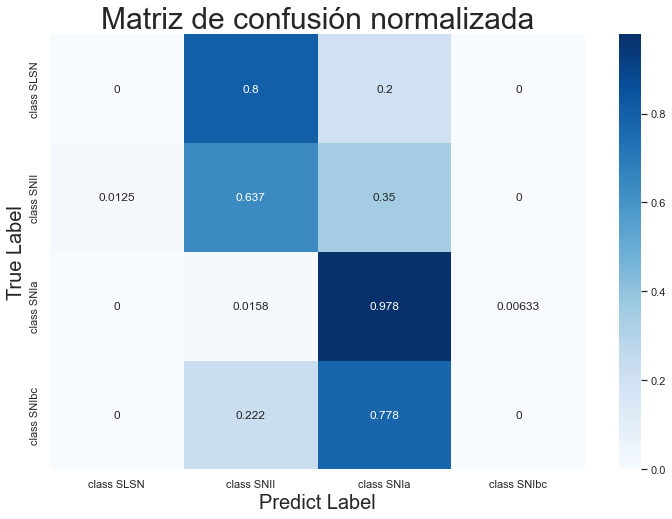

In [49]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn


columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]


confm = confusion_matrix(y_test, pred_labels,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(12,8)})
ax.set_title('Matriz de confusión normalizada',fontsize=30)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)

In [50]:
# calculate accuracy
from sklearn import metrics
accuracy_0 = metrics.accuracy_score(y_test, pred_labels)*100
presicion_0 = metrics.precision_score(y_test, pred_labels,average='macro')*100
recall_0 = metrics.recall_score(y_test, pred_labels,average='macro')*100
print("Classification accuracy is %2f"%accuracy_0,"%")
print("Classification precision is %2f"%presicion_0,"%")
print("Classification recall is %2f"%recall_0,"%")

Classification accuracy is 83.140878 %
Classification precision is 39.672619 %
Classification recall is 40.383703 %


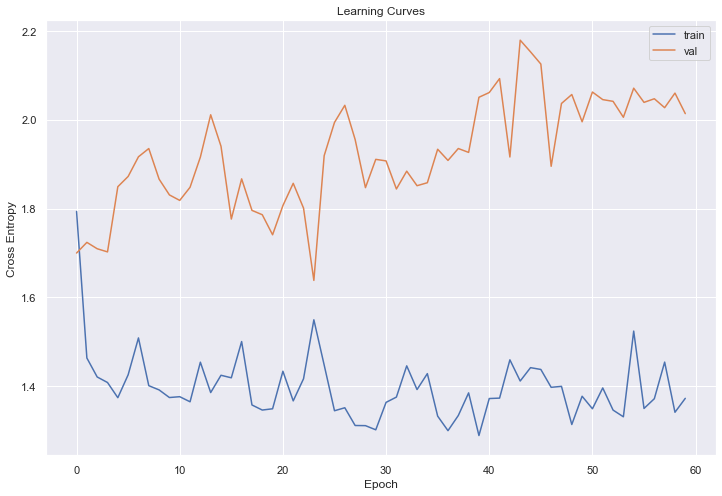

In [51]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

# Balancear los datos: Oversampling the minority class
Ojo que solo balanceamos los datos de Train

In [52]:
count_clase3 = pd.DataFrame({'y_train':y_train})
count_clase3 = count_clase3.groupby(count_clase3.columns.tolist(),as_index=False).size()
count_clase3 

,y_train,size
0,0,23
1,1,259
2,2,962
3,3,55


In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder # se codifica la clase

le = LabelEncoder()

# transform the dataset
# clase 0 : SLSN, clase 1: SNII, clase 2: SNIa,clase 3 = SNIbc
oversample = SMOTE(sampling_strategy = {0: count_clase3['size'][0]*10, 1: count_clase3['size'][1]*2, 2: count_clase3['size'][2]*1, 3: count_clase3['size'][3]*5})
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [54]:
count_clase5 = pd.DataFrame({'classALeRCE': y_train_smote})
count_clase5.groupby(count_clase5.columns.tolist(),as_index=False).size()

,classALeRCE,size
0,0,230
1,1,518
2,2,962
3,3,275


In [55]:
from sklearn.preprocessing import StandardScaler

scaler_2 = StandardScaler()
X_train_smote = scaler_2.fit_transform(X_train_smote)
X_test = scaler_2.fit_transform(X_test)

In [56]:
## Defining various initialization parameters for 163-80-40-4 MLP model
num_classes = 4
#num_features = X_train.shape[1]
feature_vector_length = X_train.shape[1]
num_output = 4
num_layers_0 = 64
num_layers_1 = 64
starter_learning_rate = 0.001
regularizer_rate = 0.1


# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (92,)


In [57]:
dropout=0.5
# Create the model
model_smote = Sequential(name='3_layer_mlp_smote')
model_smote.add(Dense(num_layers_0, input_shape=input_shape, activation='sigmoid'))
model.add(Dropout(dropout))
model_smote.add(Dense(num_layers_1, activation='relu'))
model_smote.add(Dense(num_classes, activation='softmax'))
model_smote.summary()

Model: "3_layer_mlp_smote"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                5952      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 260       
Total params: 10,372
Trainable params: 10,372
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

In [60]:

# Configure the model and start training
model_smote.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy'])
history_smote = model_smote.fit(X_train_smote, y_train_smote, epochs=200, batch_size=50, verbose=1, validation_split=0.2,callbacks=[callback,tensorboard_callback])

Epoch 1/200
32/32 [==============================] - 1s 29ms/step - loss: 0.6703 - accuracy: 0.7764 - val_loss: 2.1690 - val_accuracy: 0.3451
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4427 - accuracy: 0.8589 - val_loss: 1.5557 - val_accuracy: 0.3375
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8791 - val_loss: 1.8097 - val_accuracy: 0.3778
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 0.3377 - accuracy: 0.8873 - val_loss: 1.6361 - val_accuracy: 0.3854
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.3001 - accuracy: 0.8980 - val_loss: 1.8121 - val_accuracy: 0.3929
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.2855 - accuracy: 0.9043 - val_loss: 1.2643 - val_accuracy: 0.3728
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.2741 - accuracy: 0.9049 - val_loss: 1.1538 - val_accuracy: 0.4106
Epoch 8/200


32/32 [==============================] - 0s 4ms/step - loss: 2.0587e-04 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 0.9874
Epoch 59/200
32/32 [==============================] - 0s 4ms/step - loss: 1.9793e-04 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9874
Epoch 60/200
32/32 [==============================] - 0s 4ms/step - loss: 1.8902e-04 - accuracy: 1.0000 - val_loss: 0.0360 - val_accuracy: 0.9874
Epoch 61/200
32/32 [==============================] - 0s 4ms/step - loss: 1.8128e-04 - accuracy: 1.0000 - val_loss: 0.0342 - val_accuracy: 0.9874
Epoch 62/200
32/32 [==============================] - 0s 4ms/step - loss: 1.7303e-04 - accuracy: 1.0000 - val_loss: 0.0349 - val_accuracy: 0.9874
Epoch 63/200
32/32 [==============================] - 0s 4ms/step - loss: 1.6709e-04 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 0.9874
Epoch 64/200
32/32 [==============================] - 0s 4ms/step - loss: 1.6103e-04 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy

Epoch 170/200
32/32 [==============================] - 0s 4ms/step - loss: 1.0430e-05 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9874
Epoch 171/200
32/32 [==============================] - 0s 4ms/step - loss: 1.0183e-05 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 0.9874
Epoch 172/200
32/32 [==============================] - 0s 4ms/step - loss: 1.0038e-05 - accuracy: 1.0000 - val_loss: 0.0312 - val_accuracy: 0.9874
Epoch 173/200
32/32 [==============================] - 0s 4ms/step - loss: 9.8031e-06 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 0.9874
Epoch 174/200
32/32 [==============================] - 0s 4ms/step - loss: 9.5656e-06 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 0.9874
Epoch 175/200
32/32 [==============================] - 0s 4ms/step - loss: 9.3896e-06 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 0.9874
Epoch 176/200
32/32 [==============================] - 0s 4ms/step - loss: 9.2310e-06 - accuracy: 1.0000 - val_loss: 0

In [61]:
pred_labels_smote = model_smote.predict(X_test).argmax(axis=1) #clasificamos como la clase que tenga la mayor probabilidad

Text(84.5, 0.5, 'True Label')

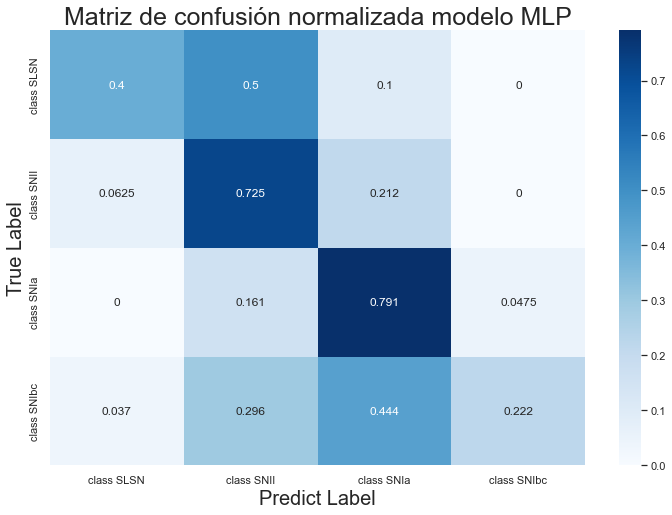

In [68]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]

confm = confusion_matrix(y_test, pred_labels_smote,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(12,8)})
ax.set_title('Matriz de confusión normalizada modelo MLP',fontsize=25)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)

In [69]:
# calculate accuracy
from sklearn import metrics
accuracy_1 = metrics.accuracy_score(y_test, pred_labels_smote)*100
presicion_1 = metrics.precision_score(y_test, pred_labels_smote,average='macro')*100
recall_1 = metrics.recall_score(y_test, pred_labels_smote,average='macro')*100
print("Classification accuracy is %2f"%accuracy_1,"%")
print("Classification precision is %2f"%presicion_1,"%")
print("Classification recall is %2f"%recall_1,"%")

Classification accuracy is 73.441109 %
Classification precision is 51.349532 %
Classification recall is 53.459037 %


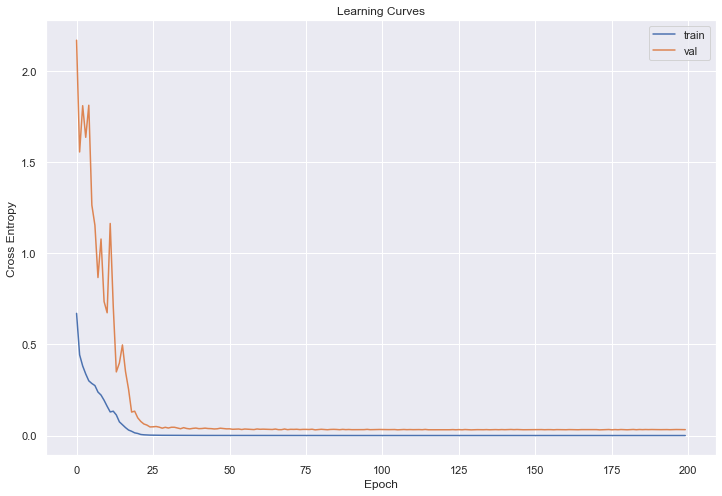

In [64]:

# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history_smote.history['loss'], label='train')
plt.plot(history_smote.history['val_loss'], label='val')
plt.legend()

In [65]:
# Guardar el Modelo
model_smote.save('Bests_models/model_smote_4.h5')

In [ ]:
# Recrea exactamente el mismo modelo solo desde el archivo
loaded_model = tf.keras.models.load_model('model_smote.h5')
pred_labels_loaded = loaded_model.predict(X_test).argmax(axis=1) #clasificamos como la clase que tenga la mayor probabilidad

# calculate accuracy
from sklearn import metrics
accuracy_l = metrics.accuracy_score(y_test, pred_labels_loaded)*100
presicion_l = metrics.precision_score(y_test, pred_labels_loaded,average='macro')*100
recall_l = metrics.recall_score(y_test, pred_labels_loaded,average='macro')*100
print("Classification accuracy is %2f"%accuracy_l,"%")
print("Classification precision is %2f"%presicion_l,"%")
print("Classification recall is %2f"%recall_l,"%")

In [ ]:
#!tensorboard --logdir logs/fit
#http://localhost:6006/

# Se despliega Tensorboard

In [2]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

In [ ]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000)     